#Simple Linear Regrassion




In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Module Traing ¶

1.Read the dataset
2.EDA , Feture Eng
3.Divide our dataset into indepent and dependent feture

In [2]:
df= pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df = df.drop(["Gender"], axis=1)

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

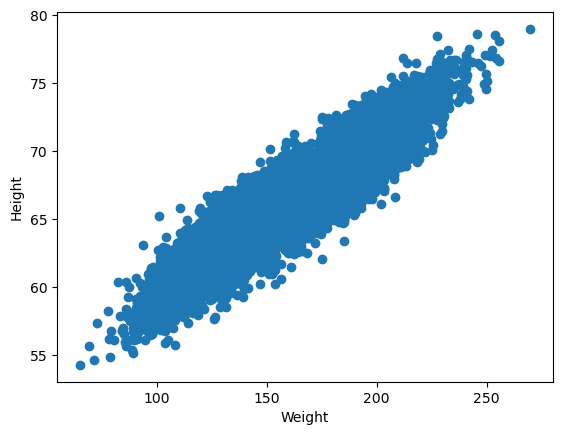

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [9]:
## Divide our dataset into indepent and dependent feture........

In [10]:
x=df[['Weight']] # indnepent feature 
y =df ['Height'] # # dependant feature

In [11]:
x.shape,y.shape

((10000, 1), (10000,))

In [12]:
# Furether dicide the dataset into train and test.

In [13]:
 from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [15]:
X_train.shape,X_test.shape

((6700, 1), (3300, 1))

In [16]:
#Standard Scaling on the train and test data 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.fit_transform(X_test)

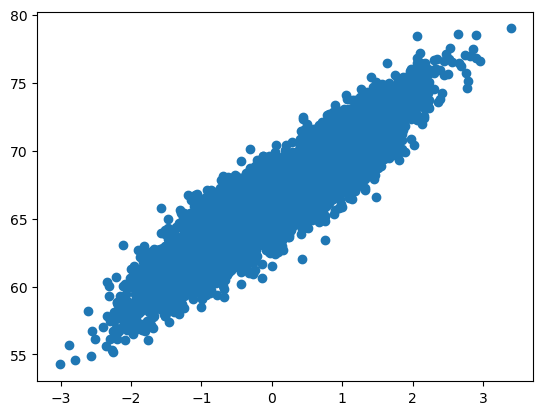

In [21]:
plt.scatter(X_train,y_train)

In [22]:
#6Model Traing

In [23]:
scaler.transform([[70]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.85753431]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()

In [26]:
## Training the train data 
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
regressor.intercept_

66.33437397792419

In [28]:
regressor.coef_

array([3.56030394])

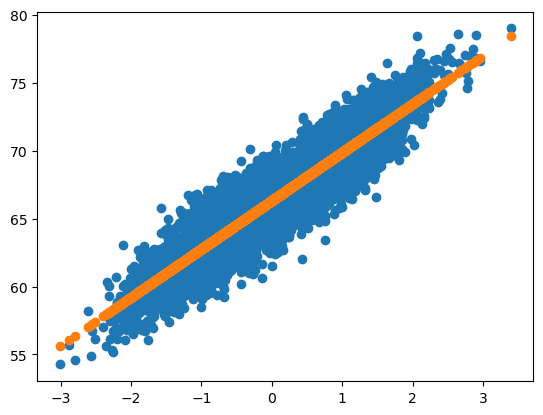

In [29]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train))

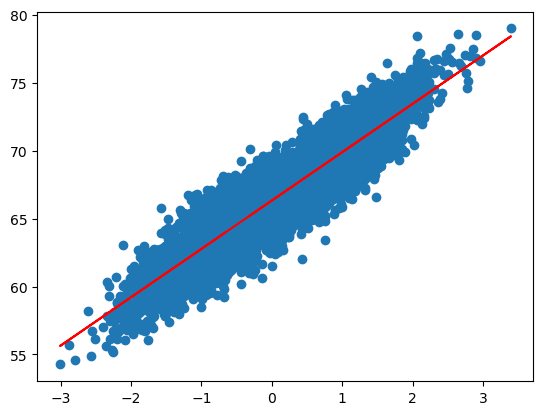

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

Prediction of train data, 


1.predicted height outout = intercept+coef_(Weight)

2.y_pred_train =66.33+3.560 (X_tain)

###Prediction of test data, 

1.predicted height output= intercept+coef_(Weight)

2.y_pred_train =66.33+3.560  (X_tain)

In [31]:
# prediction for test data
y_pred_test=regressor.predict(X_test)

In [32]:
y_pred_test

array([67.55968739, 69.99680206, 67.23928615, ..., 62.51097462,
       62.92407922, 63.76640685])

In [33]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
1744    68.211287
9754    64.500293
6094    63.957309
8781    61.430113
9401    62.450745
Name: Height, Length: 3300, dtype: float64

# Preformance Metrics MAE,MSE,RMSE,

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [38]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1131707979424044
1.1620322442645432
1.4536749285663575


## Accuracy of the model squred and Adjusted r squared
##  r squared

Formula 

**R^2 =1- SSR/SST**

-R^2 = Accuaracy of model

-SSR  =sum of squares of residuals

-SST  =total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score =r2_score(y_test, y_pred_test)
score

0.8564366922263903

### Adjusted r square
**Adjusted  R2 =1-[(1-R2)*(n-k-1)]**

where :
    
R2 : the R2 of the model

n  : the numebr of observations 

k  : the number of predictor variable 

In [43]:
# display adjusted R - squared 
1 -(1-score)*(len(y_test)-1/(y_test)-X_test.shape[1]-1)

6252   -472.469699
4684   -472.469703
1731   -472.469627
4742   -472.469793
4521   -472.469648
           ...    
1744   -472.469684
9754   -472.469563
6094   -472.469544
8781   -472.469452
9401   -472.469490
Name: Height, Length: 3300, dtype: float64

Model Making

1.Scaler

2.regressor


In [45]:
scaler

StandardScaler()

In [46]:
regressor

LinearRegression()